In [1]:
import pickle
import os
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn import decomposition
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import pickle
# Added version check for recent scikit-learn 0.18 checksok ca
from distutils.version import LooseVersion as Version
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

from sklearn.model_selection import train_test_split
##############----########### Take out what is redundant below###
from sklearn.linear_model import ElasticNet, Lasso, RidgeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [3]:
import sys
sys.path.append('/home/ak/Documents/Research/QFPaper/Huber-Norm-Regularizer')


# paths

# useful functions

In [4]:
def off_set(array_1, array_2):
    off_set= len(array_1)-len(array_2)
    return off_set

def simpleInputs(_X,_y):
    _offset =np.abs(off_set(_X,_y))
    if _offset==0:
        X = _X.as_matrix().astype(np.float)
        y=_y.astype(np.int)
    else:
        X= _X[:-_offset].as_matrix().astype(np.float)
        y = _y.astype(np.int)
    return X, y

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [5]:
symbols=['MS.N',
 'HSBA.L',
 'YHOO.O',
 'LMT.N',
 'GD.N',
 'DBKGn.DE',
 'LMT',
 'C.N','GS.N','GOOG.OQ']  
for _idx, _name in enumerate(symbols):
    print _idx, _name

0 MS.N
1 HSBA.L
2 YHOO.O
3 LMT.N
4 GD.N
5 DBKGn.DE
6 LMT
7 C.N
8 GS.N
9 GOOG.OQ


create a list and enumerate all the symbols in the list

OSError: [Errno 2] No such file or directory: '/home/ak/Documents/Data/features_models/models/'

In [7]:
# ##load data
# ticker = 'ZLc1_3' #loads specific symbol
# with open(_pkl_path + ticker+'_states_features_data.pickle', 'rb') as handle:
#     ticker_features_ = pickle.load(handle)
# with open(_pkl_path + ticker+'_states_labelled_data.pickle', 'rb') as handle:
#     ticker_labelled_data_ = pickle.load(handle)

IOError: [Errno 2] No such file or directory: '/home/ak/Documents/Data/features_models/ZLc1_3_states_features_data.pickle'

In [7]:
ticker_features_.keys()

['20100804',
 '20100820',
 '20100629',
 '20100826',
 '20100519',
 '20100518',
 '20100517',
 '20100621',
 '20100604',
 '20100602',
 '20100601',
 '20100723',
 '20100701',
 '20100628',
 '20100816',
 '20100817',
 '20100521',
 '20100527',
 '20100524',
 '20100525',
 '20100504',
 '20100819',
 '20100616',
 '20100610',
 '20100608']

In [22]:
print(ticker)
os.listdir(_pkl_path)
#need to clean the below and write the state analysis component

ZLc1_3


['RB_labelled_data.pickle',
 'models',
 'CNA_features.pickle',
 'ZLc1_2012_features.pickle',
 'ZLc1_3_states_labelled_data.pickle',
 'ZLc1_4_states_features_data.pickle',
 'ZLc12_states_labelled_data.pickle',
 'CNA_labelled_data.pickle',
 'ZLc1_3_states_features_data.pickle',
 'ZLc1_4_states_labelled_data.pickle',
 'ZLc1_2012_data.pickle',
 'AAL_features.pickle',
 'CPI_labelled_data.pickle',
 'RB_features.pickle',
 'CPI_features.pickle',
 'VOD_labelled_data.pickle',
 'zlc1_ll_results.npy',
 'VOD_features.pickle',
 'ZLc1_2012_labelled_data.pickle',
 'AAL_labelled_data.pickle',
 'ZLc1_2_states_labelled_data.pickle',
 'IOG']


Main Code

In [8]:
###the following bit is a bit redundant###
_data = ticker_labelled_data_  # data
_features = ticker_features_  # features
_keys = _data.keys()  # dates
###scalers###
mms = MinMaxScaler()
stdsc = StandardScaler()
_clfs=[]
_xr=len(_keys)-1 #what is this
T=1
M=_xr #what is this


In [9]:
len(_keys)

25

In [10]:
_columns=_data[_keys[1]].columns.values
_columns #simple data+simple labels

array(['TradedTime', 'TradedPrice', 'ReturnTradedPrice', 'Duration',
       'label_control_chart_q_40_q_70_window_15',
       'label_simple_ep_window_20_thresh_0.05',
       'label_simple_ep_window_20_thresh_0.00'], dtype=object)

In [11]:
_model_results= {
    'clfs': np.empty((M, T)),
    'test_F1': np.empty((M, T)),
    'data_date': np.empty((M, T)),
    'test_recall': np.empty((M, T)),
    'train_recall': np.empty((M, T)),
    'test_accuracy' :np.empty((M, T)),
    'train_accuracy' :np.empty((M, T)),
}

In [12]:
_model_results.keys()

['test_F1',
 'train_accuracy',
 'test_recall',
 'train_recall',
 'clfs',
 'test_accuracy',
 'data_date']

In [13]:
n_jobs=1

print("#of models:",_xr)
print("for ticker:", ticker)
for _idx in xrange(0, 2): #replace this w _xr
    # various types of labels
    y_cc = _data[_keys[_idx]].iloc[:, 6].dropna().astype(int).values  # label_simple_ep_window_5_thresh_0.00-last 4 are NaN
    y_duration = _data[_keys[_idx]].iloc[:, 3].dropna().astype(int).values
    y_price = _data[_keys[_idx]].iloc[:, 1].dropna().astype(int).values # can be used for regression

    # feature set
    _gamma = _features[_keys[_idx]][2]
    _csi = _features[_keys[_idx]][3]
    _info = _features[_keys[_idx]][1]
    _fischer = _features[_keys[_idx]][0]
    short_rolling = _data[_keys[_idx]]['TradedPrice'].rolling(window=5).mean()
    long_rolling = _data[_keys[_idx]]['TradedPrice'].rolling(window=15).mean()
    ma_signal = (long_rolling - short_rolling).fillna(0)
    
    df_features = pd.concat([_csi, _gamma, _fischer,_data[_keys[_idx]]['TradedPrice']], axis=1)
    
    df_features['MA_signal'] = df_features['TradedPrice'].rolling(window=15).mean()-df_features['TradedPrice'].rolling(window=5).mean()
    df_features=df_features.dropna()
        
    
    
    y_ = y_cc
    X, y = simpleInputs(df_features, y_) #simple inputs just makes sure all the sizes fit
    X_p, y = simpleInputs(df_features['MA_signal'], y_)
           
    print("number of classes:",len(np.unique(y)))  # of classes
    print(len(X)==len(y))
    print(len(X_p)==len(y))


    # # Train a SVM classification model
    param_grid = dict(kernel=["rbf"],C=[1,5,10,25,50],gamma=[0.0001,0.001,0.01])
    X_p= X_p.reshape(-1, 1)
    X_mms =mms.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=.3, random_state=0)

    clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, verbose=1,n_jobs=-1,cv=5)
    
    clf.fit(X_train, y_train)#fitting the first model
    y_predict = clf.predict(X_test) #predict on test set
    y_predict_train= clf.predict(X_train)
# #     filename = _models_path + str(ticker) + '_' + str(_keys[_idx]) + '_clf' + '.joblib.pkl'
# #     pickle.dump(clf, open(filename, 'wb'))
#     print('SVM Best Params & Score:')
#     print clf.best_params_, clf.best_score_
    _clfs.append(clf)
    clf_files = _models_path + str(ticker) + '_clfs_'  + '.pkl'
    pickle.dump(_clfs, open(clf_files, 'wb'))
    print("#of models   left:",_xr -_idx)    
    print('Accuracy: %.2f' % accuracy_score(y_test, y_predict))
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_predict))
#     print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_predict))
#     print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_predict))
    _model_results['test_accuracy'][_idx, :] = accuracy_score(y_test, y_predict)
    _model_results['test_recall'][_idx, :] = recall_score(y_true=y_test, y_pred=y_predict)
    _model_results['train_accuracy'][_idx, :] = accuracy_score(y_train, y_predict_train)
    _model_results['train_recall'][_idx, :] = recall_score(y_true=y_train, y_pred=y_predict_train)
    _model_results['test_F1'][_idx, :]=f1_score(y_true=y_test, y_pred=y_predict)
    




('#of models:', 24)
('for ticker:', 'ZLc1_3')
('number of classes:', 2)
True
True
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.4s finished


('#of models   left:', 24)
Accuracy: 0.78
Precision: 0.778
('number of classes:', 2)
True
True
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   30.9s finished


('#of models   left:', 23)
Accuracy: 0.79
Precision: 0.632


In [14]:
_result_keys=_model_results.keys()

In [23]:
clf.best_params_['C']

50

In [15]:
test_accuracy_=pd.DataFrame(_model_results['test_accuracy']).round(2)
train_accuracy_=pd.DataFrame(_model_results['train_accuracy']).round(2)

%matplotlib inline
import matplotlib.pyplot as plt
T=1
M=_xr
_learning_results= {
    'train_score': np.empty((M, T)),
    'train_std': np.empty((M, T)),
    'test_score': np.empty((M, T)),
    'test_std': np.empty((M, T)),    
}

In [21]:
_clfs

[GridSearchCV(cv=5, error_score='raise',
        estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
        fit_params=None, iid=True, n_jobs=-1,
        param_grid={'kernel': ['rbf'], 'C': [1, 5, 10, 25, 50], 'gamma': [0.0001, 0.001, 0.01]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring=None, verbose=1), GridSearchCV(cv=5, error_score='raise',
        estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
        fit_params=None, iid=True, n_jobs=-1,
        param_grid={'kernel': ['rbf'], 'C': [1, 5, 10, 25, 50], 'gamma': [0.0001, 0.001, 0.01]},
        pre_dispatch=

In [17]:
print("#of models:",_xr)
print("for ticker:", ticker)
all_train_scores_mean=[]
all_train_scores_std=[]
all_test_scores_mean=[]
all_test_scores_std=[]
for _idx in xrange(0, _xr): #replace this w _xr
    # various types of labels
    y_cc = _data[_keys[_idx]].iloc[:, 6].dropna().astype(int).values  # label_simple_ep_window_5_thresh_0.00-last 4 are NaN
    y_duration = _data[_keys[_idx]].iloc[:, 3].dropna().astype(int).values
    y_price = _data[_keys[_idx]].iloc[:, 1].dropna().astype(int).values # can be used for regression
#     f= FloatProgress(min=0, max=100)
#     display(f)
#     f.value +=1

    # feature set
    _gamma = _features[_keys[_idx]][2]
    _csi = _features[_keys[_idx]][3]
    _info = _features[_keys[_idx]][1]
    _fischer = _features[_keys[_idx]][0]
    short_rolling = _data[_keys[_idx]]['TradedPrice'].rolling(window=5).mean()
    long_rolling = _data[_keys[_idx]]['TradedPrice'].rolling(window=15).mean()
    ma_signal = (long_rolling - short_rolling).fillna(0)
    
    df_features = pd.concat([_csi, _gamma, _fischer,_data[_keys[_idx]]['TradedPrice']], axis=1)
    
    df_features['MA_signal'] = df_features['TradedPrice'].rolling(window=15).mean()-df_features['TradedPrice'].rolling(window=5).mean()
    df_features=df_features.dropna()
        
    
    
    y_ = y_cc
    X, y = simpleInputs(df_features, y_)
    X_p, y = simpleInputs(df_features['MA_signal'], y_)
           
    # # Train a SVM classification model

    X_p= X_p.reshape(-1, 1)
    X_mms = mms.fit_transform(X)
    X,y = X_mms, y
    
    
    # score curves, each time with 20% data randomly selected as a validation set.
    train_sizes=np.linspace(.1, 1.0, 5)
    title = str(ticker)+" Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
    estimator = SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
                    max_iter=-1, probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False)
    n_jobs=4
    print ('Doing Key:', _idx)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    all_train_scores_mean.append(np.mean(train_scores, axis=1))
    all_train_scores_std.append(np.std(train_scores, axis=1))
    all_test_scores_mean.append(np.mean(test_scores, axis=1))
    all_test_scores_std.append(np.std(test_scores, axis=1))
 
 

    

    

('#of models:', 24)
('for ticker:', 'ZLc1_3')
('Doing Key:', 0)
('Doing Key:', 1)
('Doing Key:', 2)
('Doing Key:', 3)
('Doing Key:', 4)
('Doing Key:', 5)
('Doing Key:', 6)
('Doing Key:', 7)
('Doing Key:', 8)
('Doing Key:', 9)
('Doing Key:', 10)
('Doing Key:', 11)
('Doing Key:', 12)
('Doing Key:', 13)
('Doing Key:', 14)
('Doing Key:', 15)
('Doing Key:', 16)
('Doing Key:', 17)
('Doing Key:', 18)
('Doing Key:', 19)
('Doing Key:', 20)
('Doing Key:', 21)
('Doing Key:', 22)
('Doing Key:', 23)


In [39]:
X.shape

(14313, 17)

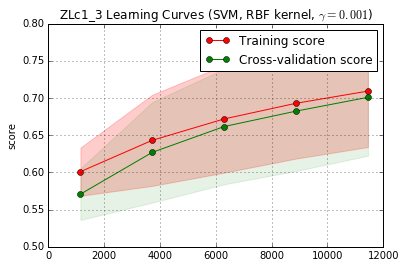

In [35]:
all_train_scores_mean=np.array(all_train_scores_mean)
all_test_scores_mean=np.array(all_test_scores_mean)

_train_scores_std=all_train_scores_mean.std(axis=0)
_train_scores_mean =all_train_scores_mean.mean(axis=0)

_test_scores_std=all_test_scores_mean.std(axis=0)
_test_scores_mean =all_test_scores_mean.mean(axis=0)
plt.figure()
title = str(ticker)+" Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
plt.title(title)
ylim=None
if ylim is not None:
    plt.ylim(*ylim)
plt.grid()
plt.fill_between(train_sizes, _train_scores_mean - _train_scores_std,
                     _train_scores_mean + _train_scores_std, alpha=0.2,
                     color="r")
plt.fill_between(train_sizes, _test_scores_mean - _test_scores_std,
                     _test_scores_mean + _test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, _train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, _test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.ylabel("score")
plt.savefig(figures_path+'learning_curves.png')
plt.show()

plt.plot(test_accuracy_)
plt.plot(train_accuracy_, color='r')

plt.title('Test Accuracy for ticker: '+str(ticker))
plt.savefig(_graphs_path+str(ticker)+'_test_accuracy.png', dpi=300)

## We will compare the HuberSVM with $l_1$, $l_2$ and elastic-net-regularized SVMs. We will optimize the regularization parameters for each SVM in nested cross validation with an outer loop of five folds and stratified sampling for accuracy.

In [40]:
lasso = OneVsRestClassifier(Lasso())
param_lasso = {'estimator__alpha': [ 1, 0.1, 1e-3]}

elastic = OneVsRestClassifier(ElasticNet())
param_elastic = {'estimator__alpha': [10, 1, 1e-3], 
                 'estimator__l1_ratio': np.linspace(0.01, 0.29, 5)}

ridge = RidgeClassifier(solver='lsqr')
param_ridge = {'alpha': [100, 10, 1, 0.1]}

huber = OneVsRestClassifier(HuberSVC())
param_huber = {'estimator__C': [100,1,1e-2, 1e-3], 
              'estimator__lambd': [10, 1, 0.1], 
              'estimator__mu': [ 10, 1, 0.1, 1e-2]}


# huber = OneVsRestClassifier(HuberSVC())
# param_huber = {'estimator__C': [100, 10, 1, 0.1, 1e-2, 1e-3], 
#               'estimator__lambd': [100, 10, 1, 0.1, 1e-2, 1e-3], 
#               'estimator__mu': [100, 10, 1, 0.1, 1e-2, 1e-3]}

param_lr = {
        'C':  np.arange(1.0, 3.0)
         , 'solver': ['newton-cg']
    }
lr_clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)

param_svc = dict(kernel=["linear","rbf"],C=[1,5,10,25,50],gamma=[0.0001,0.001,0.01])
svc_clf = svm.SVC(class_weight='balanced')
###see if the below works###
n_folds = 5
param_folds = 2
scoring = 'accuracy'


In [41]:
from ipywidgets import FloatProgress
from IPython.display import display
f= FloatProgress(min=0, max=100)
display(f)
f.value +=1

In [42]:
result_df = pd.DataFrame()
best_clfs=[]
# f= FloatProgress(min=0, max=100)y
# display(f)
cv=StratifiedKFold(n_splits=n_folds)

for i, (train_index, test_index) in enumerate(cv.split(X,y)):
    for clf_name, clf, param_grid in [('Lasso', lasso, param_lasso), 
                                      ('ElasticNet', elastic, param_elastic), 
                                      ('Ridge', ridge, param_ridge),
                                      ('Logistic', lr_clf, param_lr),
                                      ('SVC',svc_clf, param_svc),
                                      ('HuberSVC', huber, param_huber)]:
        X=X_mms
        ##progress bar
        
#         f.value +=1
#       ##main code
        gs = GridSearchCV(clf, param_grid, scoring=scoring, cv=param_folds, n_jobs=-1, refit='AUC')
        gs.fit(X[train_index], y[train_index])
        best_clf = gs.best_estimator_
        best_clfs.append(best_clf)

        score = accuracy_score(y[test_index], best_clf.predict(X[test_index]))
        result_df.loc[i, clf_name] = score
        

In [43]:
result_df.loc['Mean'] = result_df.mean()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.3f}'.format
result_df

,Lasso,ElasticNet,Ridge,Logistic,SVC,HuberSVC
0,0.773,0.689,0.691,0.721,0.614,0.689
1,0.692,0.689,0.690,0.699,0.819,0.779
2,0.698,0.689,0.699,0.717,0.810,0.778
3,0.698,0.689,0.721,0.735,0.742,0.791
4,0.692,0.690,0.718,0.742,0.681,0.781
Mean,0.710,0.689,0.704,0.723,0.733,0.764


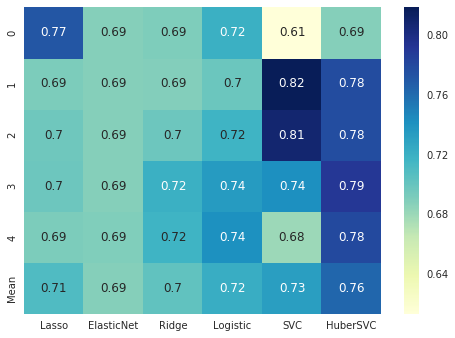

In [58]:
import seaborn as sns; 
sns.set()
sns_plot= sns.heatmap(result_df,annot=True,cmap="YlGnBu")
sns_plot.figure.savefig(figures_path+'multiple_models.png')

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
np.array(results)